<a href="https://colab.research.google.com/github/neonithinar/ML_and_DL_learning_materials_and_tryouts/blob/master/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import os 

import tensorflow as tf 
from tensorflow import keras
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [70]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import time
import PIL.Image
import numpy as np
import functools

In [71]:
def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor, dtype= np.uint8)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

    

In [72]:
almond_blossoms = tf.keras.utils.get_file('almond_blossoms.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Vincent_van_Gogh_-_Almond_blossom_-_Google_Art_Project.jpg/759px-Vincent_van_Gogh_-_Almond_blossom_-_Google_Art_Project.jpg')
dancers_in_blue_path = tf.keras.utils.get_file('Dancers.jpg', 'https://uploads3.wikiart.org/images/edgar-degas/dancers-in-blue-1895.jpg!Large.jpg')
starry_night = tf.keras.utils.get_file('starry_night.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
ravi_varma = tf.keras.utils.get_file("ravi_varma.jpg", 'https://lh6.ggpht.com/j7qLKq_iLMeyia6XrMqq1vcX5DVvoDOKmLM_dDfTNuS_AjffXqFo2pUjI4AC=s1200')
composition8 = tf.keras.utils.get_file("composition8.jpg", "https://www.guggenheim.org/wp-content/uploads/1923/01/37.262_ph_web-1.jpg")
sophie_stained_glass = tf.keras.utils.get_file("stained.jpg", "https://amazon.clikpic.com/sophiedsouza/images/dove_closest.jpg")
leaf = tf.keras.utils.get_file("leaf.jpg", "https://hartlebury.worcs.sch.uk/wp-content/uploads/2020/10/Autumn-Leaves-in-sunshine.jpg")





In [73]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  print("shape of old image: {}".format(img.shape))

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)
  img = img[tf.newaxis, :]
  print("shape of new image: {}".format(img.shape))
  return img

Simple function to display image imshow

In [74]:
def imshow(image, title= None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis = 0)
  
  plt.imshow(image)
  if title:
    plt.title(title)
    

In [75]:
test_image_path = os.path.join("ArchanaMS.jpeg")
test_image = load_img(test_image_path)
print(test_image.shape)

shape of old image: (533, 800, 3)
shape of new image: (1, 533, 800, 3)
(1, 533, 800, 3)


shape of old image: (533, 800, 3)
shape of new image: (1, 533, 800, 3)
shape of old image: (800, 600, 3)
shape of new image: (1, 800, 600, 3)


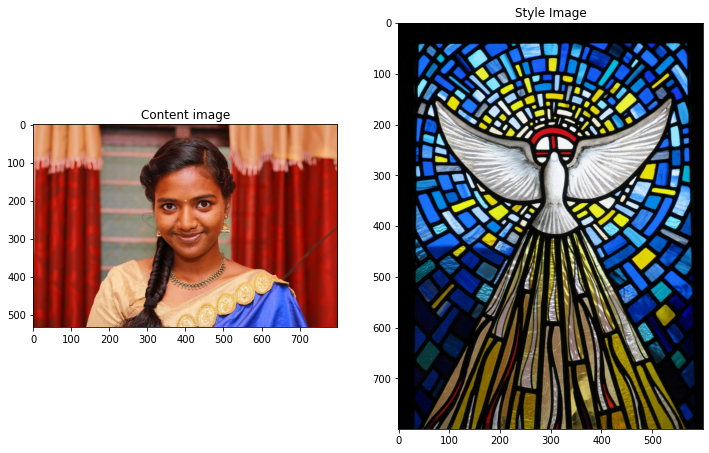

In [76]:
content_image = load_img(test_image_path)
style_image = load_img(sophie_stained_glass)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content image')

plt.subplot(1, 2, 2)
imshow(style_image, "Style Image")

In [77]:
# file_name = 'input_images.png'
# tensor_to_image(content_image).save(file_name)

# try:
#   from google.colab import files
# except ImportError:
#    pass
# else:
#   files.download(file_name)


  
# file_name = 'style_image.png'
# tensor_to_image(style_image).save(file_name)

# try:
#   from google.colab import files
# except ImportError:
#    pass
# else:
#   files.download(file_name)

In [78]:
# import tensorflow_hub as hub
# hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
# stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
# tensor_to_image(stylized_image)

In [79]:
almond_blossoms_style = load_img(almond_blossoms)

shape of old image: (600, 759, 3)
shape of new image: (1, 600, 759, 3)


# Real Time implementation

In [80]:
from tensorflow import keras

X = keras.applications.vgg19.preprocess_input(content_image * 255)
X = tf.image.resize(X, (224, 224))
vgg = keras.applications.VGG19(include_top = True, weights = 'imagenet')
prediction_proba = vgg(X)
print(prediction_proba.shape)

(1, 1000)


In [81]:
prediction_top_5 = keras.applications.vgg19.decode_predictions(prediction_proba.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in prediction_top_5]



[('theater_curtain', 0.6136303),
 ('groom', 0.06161333),
 ('vestment', 0.04527425),
 ('kimono', 0.039273817),
 ('panpipe', 0.032290265)]

In [82]:
#loading VGG classification layers and printing the layer names

vgg = keras.applications.VGG19(include_top= False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)


input_10
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [83]:
content_layers = ['block5_conv2']

style_layers = ['block1_conv1', 'block2_conv1','block3_conv1','block4_conv1','block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)


Following code builds a VGG19 model and returns a list of intermediate layer outputs

In [84]:
def vgg_layers(layer_names):
  """creates a VGG19 model that returns a list of intermediat output values"""
  vgg = keras.applications.VGG19(include_top= False, weights= 'imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = keras.Model([vgg.input], outputs)
  return model
  

In [85]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(content_image *255)

# Looking at the statistics of each Layer's output

for name, output in zip(style_layers, style_outputs):
  print(name)
  print("   shape: ", output.numpy().shape)
  print("   min:  ", output.numpy().min())
  print("   max:  ", output.numpy().max())
  print("   mean:   ", output.numpy().mean())
  print()

block1_conv1
   shape:  (1, 533, 800, 64)
   min:   0.0
   max:   789.5878
   mean:    34.55299

block2_conv1
   shape:  (1, 266, 400, 128)
   min:   0.0
   max:   3865.6235
   mean:    140.18279

block3_conv1
   shape:  (1, 133, 200, 256)
   min:   0.0
   max:   8579.891
   mean:    127.10892

block4_conv1
   shape:  (1, 66, 100, 512)
   min:   0.0
   max:   14824.649
   mean:    488.54187

block5_conv1
   shape:  (1, 33, 50, 512)
   min:   0.0
   max:   2761.146
   mean:    37.382275



# Calculate Style
The content of an image is represented by the values of the intermediate feature maps.

It turns out, the style of an image can be described by the means and correlations across the different feature maps. Calculate a Gram matrix that includes this information by taking the outer product of the feature vector with itself at each location, and averaging that outer product over all locations.

In [86]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc, bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
  return result / (num_locations)


**Extract Style and content**


build a subclassing API for returning style and content tensors

In [87]:
class StyleContentModel(keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg_trainable = False

  def call(self, inputs):
    """Expects float input in [0, 1]"""
    inputs = inputs * 255.
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], outputs[self.num_style_layers:])
    style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

    content_dict = {content_name:value for content_name, value in zip(self.content_layers, content_outputs)}
    
    style_dict = {style_name:value for style_name, value in zip(self.style_layers, style_outputs)}

    return {'content':content_dict, 'style': style_dict}


In [88]:
Extractor  = StyleContentModel(style_layers, content_layers)
results = Extractor(tf.constant(content_image))


print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0006430084
    max:  28356.014
    mean:  789.70337

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  94696.65
    mean:  13041.881

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  387667.16
    mean:  14164.81

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  4185333.8
    mean:  207284.45

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  104647.04
    mean:  1533.1381

Contents:
   block5_conv2
    shape:  (1, 33, 50, 512)
    min:  0.0
    max:  1407.4166
    mean:  14.350435


**Run Gradient Descent**

Calculate MSE of your image's output relative to each target, then take the weighted sum of these losses


In [89]:
style_targets = Extractor(style_image)['style']
content_targets = Extractor(content_image)['content']

image = tf.Variable(content_image)
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min = 0.0, clip_value_max=1.0)

opt = tf.optimizers.Adam(learning_rate = 0.02, beta_1 = 0.99, epsilon=1e-1)

style_weight = 1e-2
content_weight = 1e4

def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss



In [90]:

@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = Extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

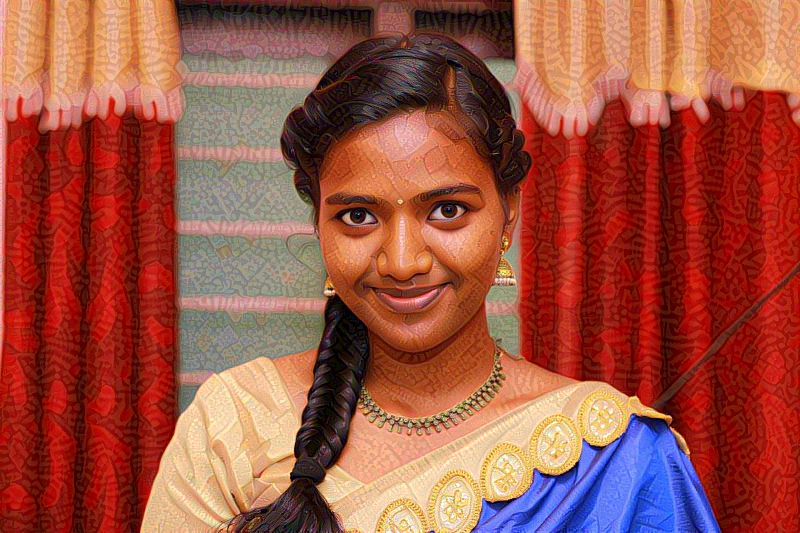

In [91]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

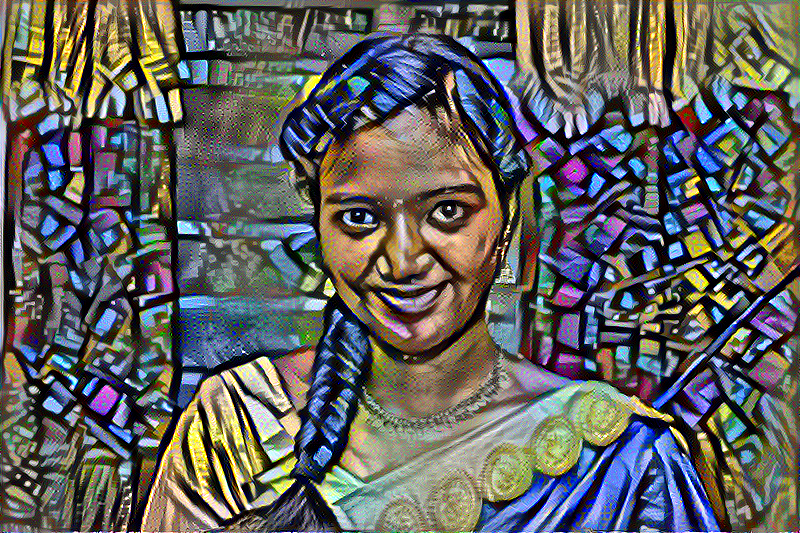

Train step: 1000
Total time: 159.0


In [92]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

# Total Variational_loss

In [93]:
def high_pass_x_y(image):
  x_var = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var = image[:,1:,:,:] - image[:,:-1,:,:]

  return x_var, y_var

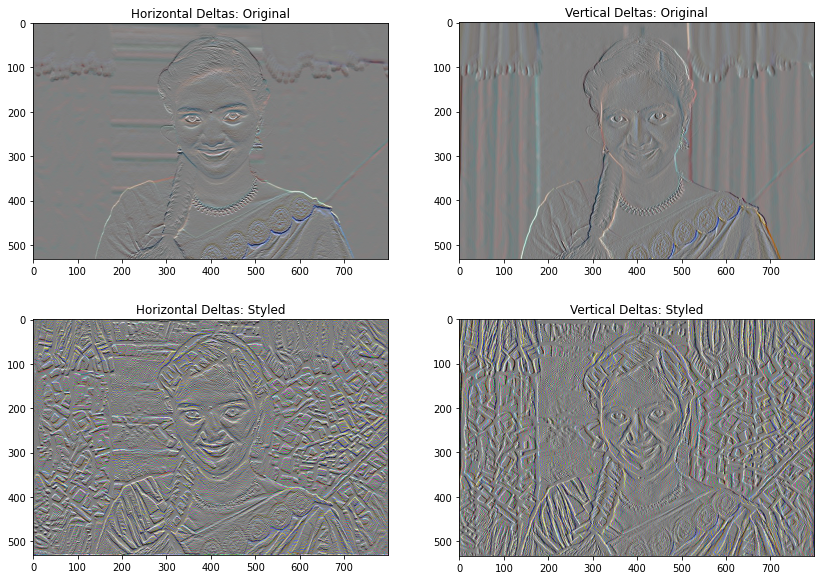

In [94]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2,2,3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2,2,4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled") 

Also using sobel Edge detector

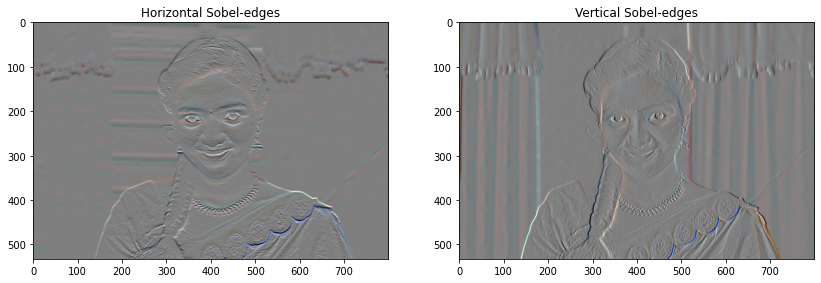

In [95]:
plt.figure(figsize=(14,10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1,2,1)
imshow(clip_0_1(sobel[...,0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1,2,2)
imshow(clip_0_1(sobel[...,1]/4+0.5), "Vertical Sobel-edges")

In [96]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [97]:
total_variation_loss(image).numpy()

289413.5

In [98]:
total_variation_weight=30

In [99]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = Extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In [100]:
image = tf.Variable(content_image)

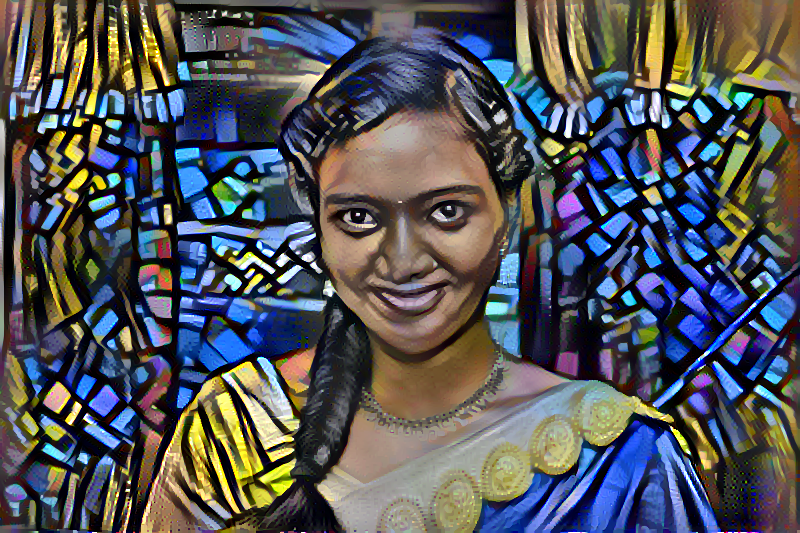

Train step: 2500
Total time: 400.9


In [101]:
import time
start = time.time()

epochs = 25
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [102]:
# file_name = 'achu_autumn.png'
# tensor_to_image(image).save(file_name)

# try:
#   from google.colab import files
# except ImportError:
#    pass
# else:
#   files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>